## Name- Ranjan Pratap Singh                                                      DS2307

# Avocado Project
## Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Some relevant columns in the dataset:
•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\RANJAN\OneDrive\Desktop\avocado.csv")

### Exploratory Data Analysis(EDA)  ----->

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


our dataset of Avocado has 18249rows and 14 columns. here we will take region and average price one by one as target variable . region has cetegorical data so we will use classification models to train, test, and predict and Average Price has numrerical data so we will use regression models for trian,test,predict .

#### checking for duplicated values

In [4]:
df.duplicated().sum()

0

here we can see that there are no duplicated values.

 'Unnamed: 0' has no relevance for our datset so we will remove this from datset 

In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


#### Here we observe our datatypes . 
We observe that  our features have  all datatypes -'float64', int and object(string)
#### We can see that there is no null values but to check it further  the possibility of white sapces    we will  check again

In [7]:

for i in df.columns:
    print(df[i].value_counts())
    print('\n--------------------------------\n')


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

--------------------------------

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

--------------------------------

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64

--------------------------------

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64

--------------------------------

0.00         61
1

here we can see that there are no null values  

In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In description we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see  that average price is almost normally distributed and  all the  other data are skewed we will furhter see  later in the project.

if we see for outliers we can observe that there may be outliers in 4066,4255,4770,Small bags Large Bags,Xlarge Bags but we will anlyse it later in the project 

# data visualization

- Univariate 

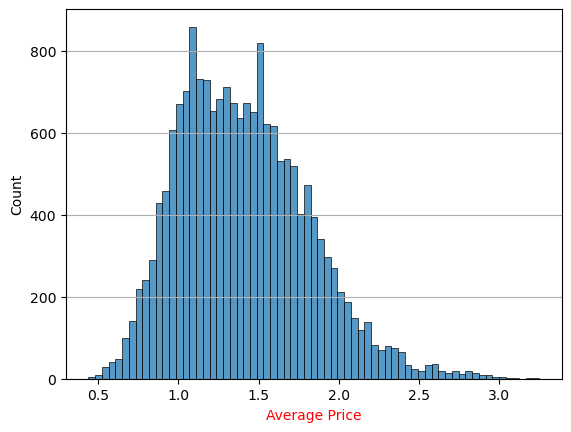

In [9]:
sns.histplot(x='AveragePrice' , data = df )
plt.xlabel('Average Price',color = 'r')
plt.grid(axis ='y')
plt.show()


here we can obseve that the average price of a single avocado  mostly is in ther range of 0.6 to 2

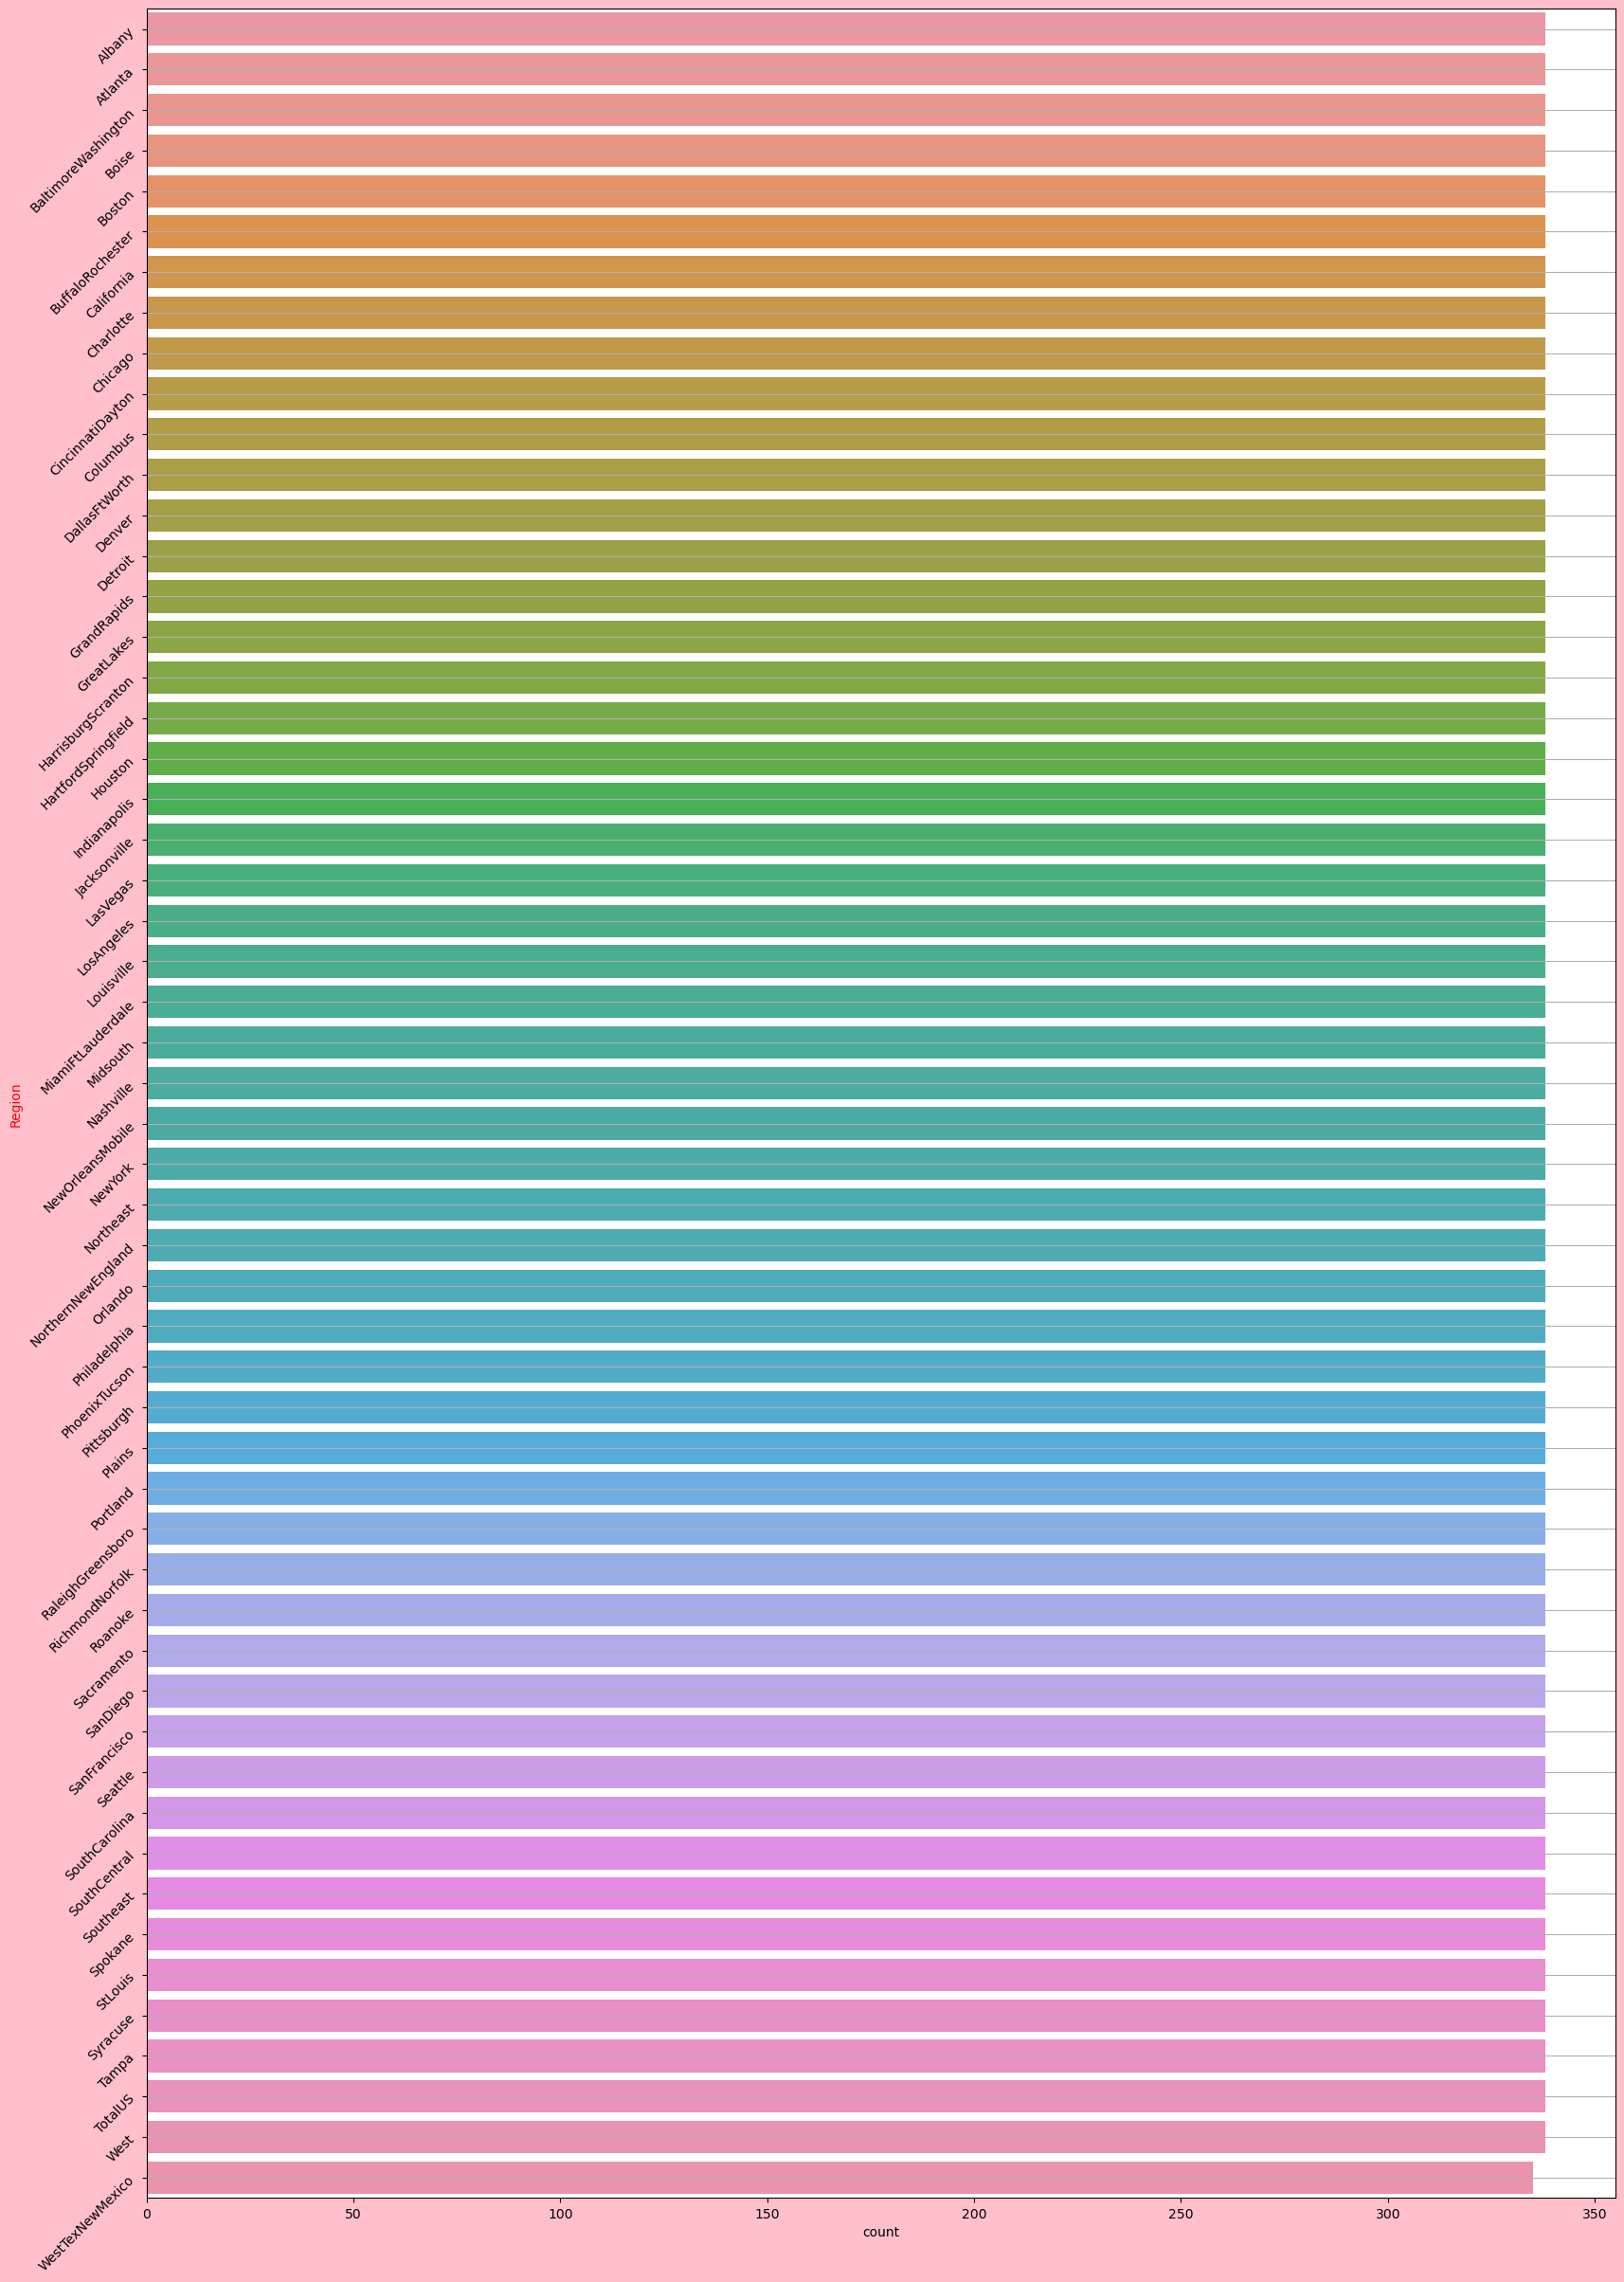

In [10]:
plt.figure(figsize=(20,30), facecolor="pink")
sns.countplot(y='region' , data = df )
plt.ylabel('Region',color = 'r')
plt.yticks(rotation=45)
plt.grid(axis ='y')
plt.show()


In [11]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

here we can observe that almost all the region are equal

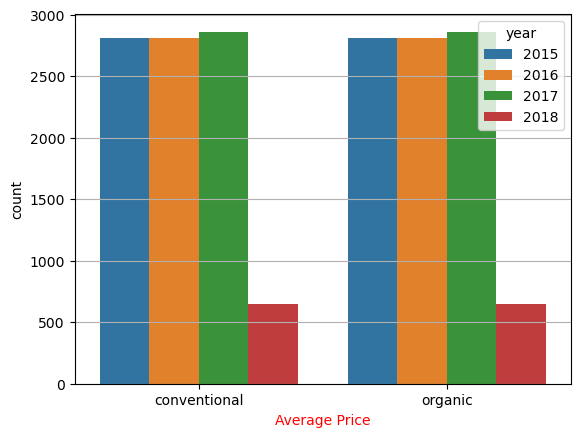

In [15]:
sns.countplot(x='type' , data = df , hue= 'year')
plt.xlabel('Average Price',color = 'r')
plt.grid(axis ='y')
plt.show()


here we can see that there is no significnace difference between organic and conventional and both are less in year 2018

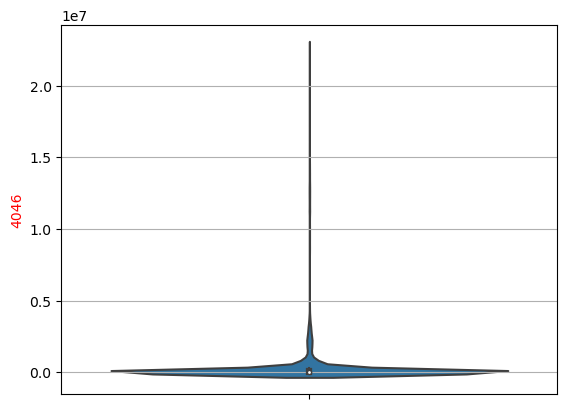

In [12]:
sns.violinplot(y='4046' , data = df )
plt.ylabel('4046',color = 'r')
plt.grid(axis ='y')
plt.show()

here 4066 type of avocado looks highly skewed 

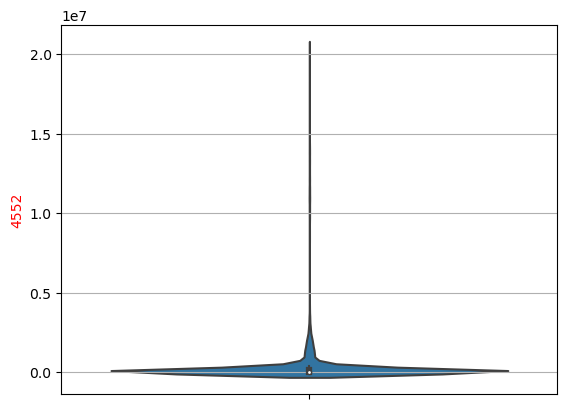

In [13]:
sns.violinplot(y='4225' , data = df )
plt.ylabel('4552',color = 'r')
plt.grid(axis ='y')
plt.show()

here 4255 type of avocado looks highly skewed 

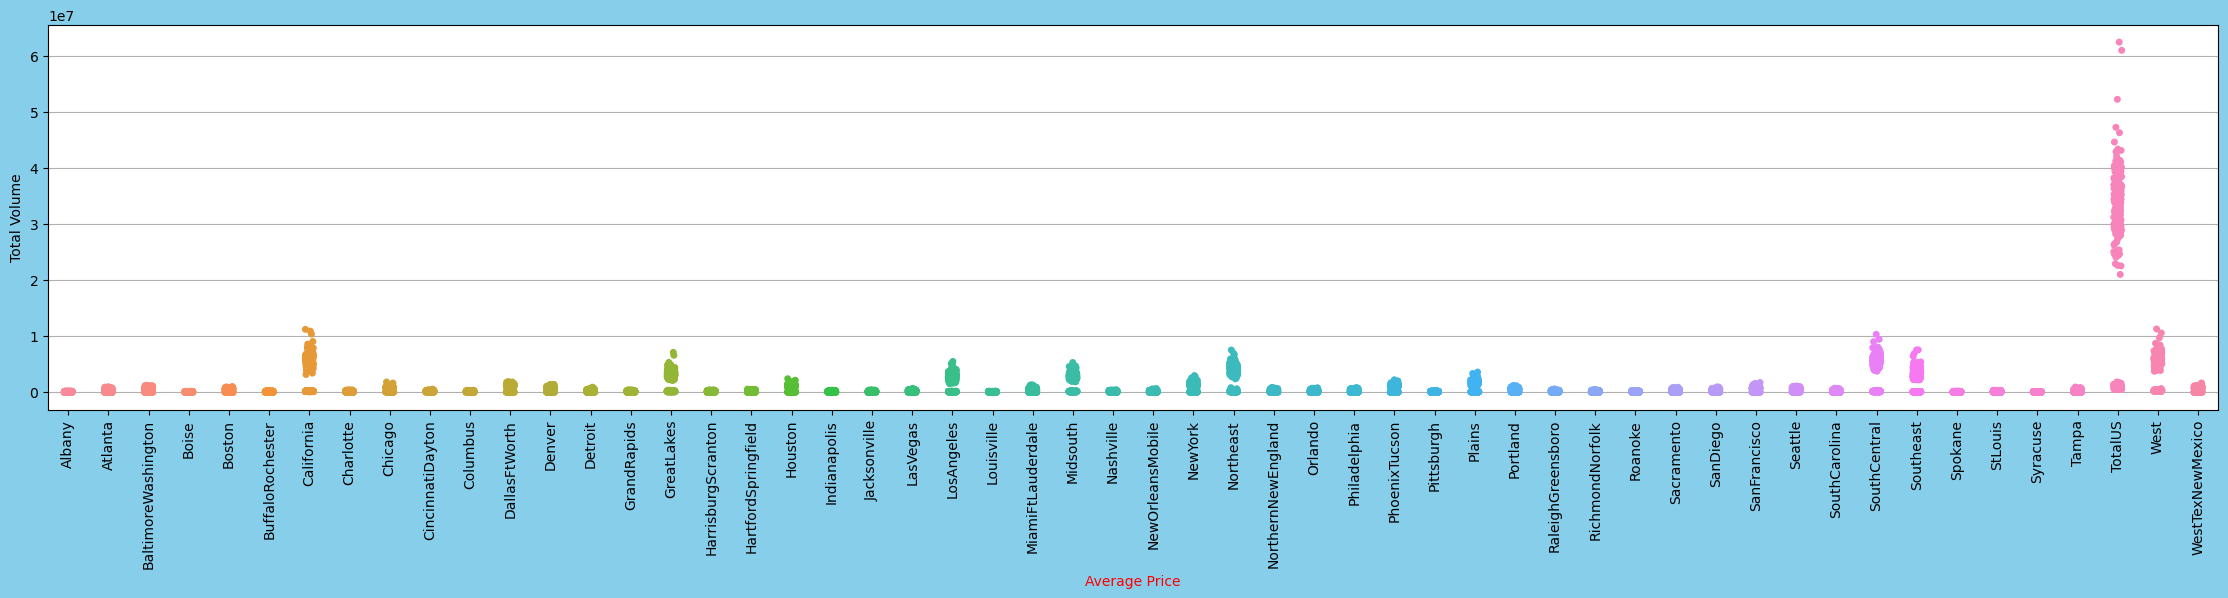

In [23]:
plt.figure(figsize=(28, 5), facecolor="skyblue")
sns.stripplot(y ='Total Volume', x='region', data = df)
plt.xlabel('Average Price',color = 'r')
plt.xticks(rotation=90)
plt.grid(axis ='y')
plt.show()


we see then plot we can see that california,GreatLakes,LosAngles,NOrtheast,Southcentral,Southeast,west has  comparitevely more Total Volume

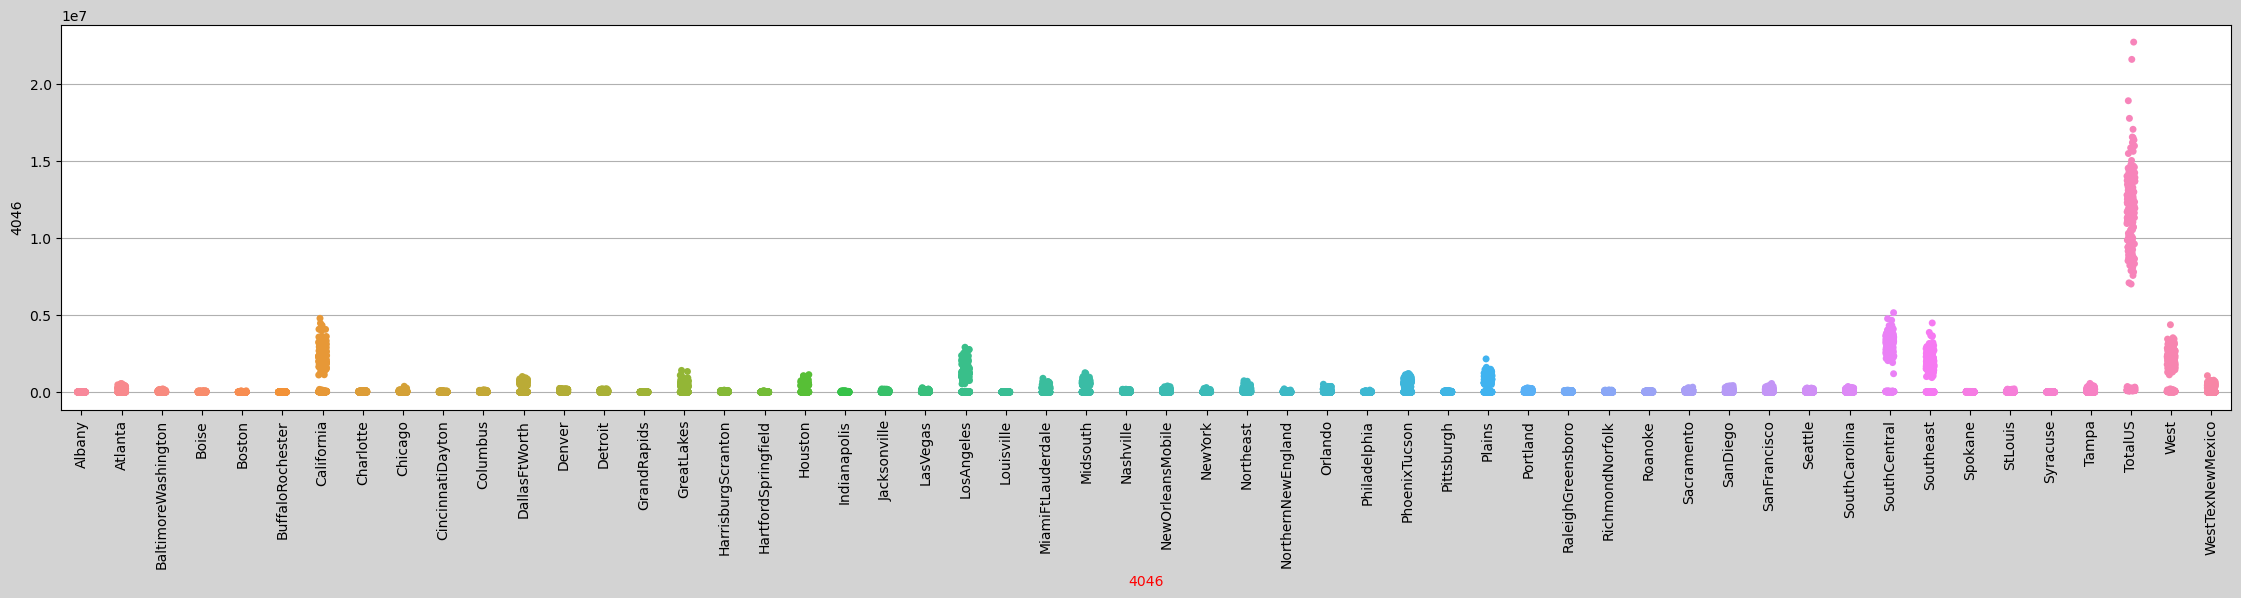

In [27]:
plt.figure(figsize=(28, 5), facecolor="lightgrey")
sns.stripplot(y ='4046', x='region', data = df)
plt.xlabel('4046',color = 'r')
plt.xticks(rotation=90)
plt.grid(axis ='y')
plt.show()

 we see then plot we can see that california,GreatLakes,Huston,LosAngles,Midsouth,Southcentral,Southeast,west has  comparitevely more 4066 type of avocado

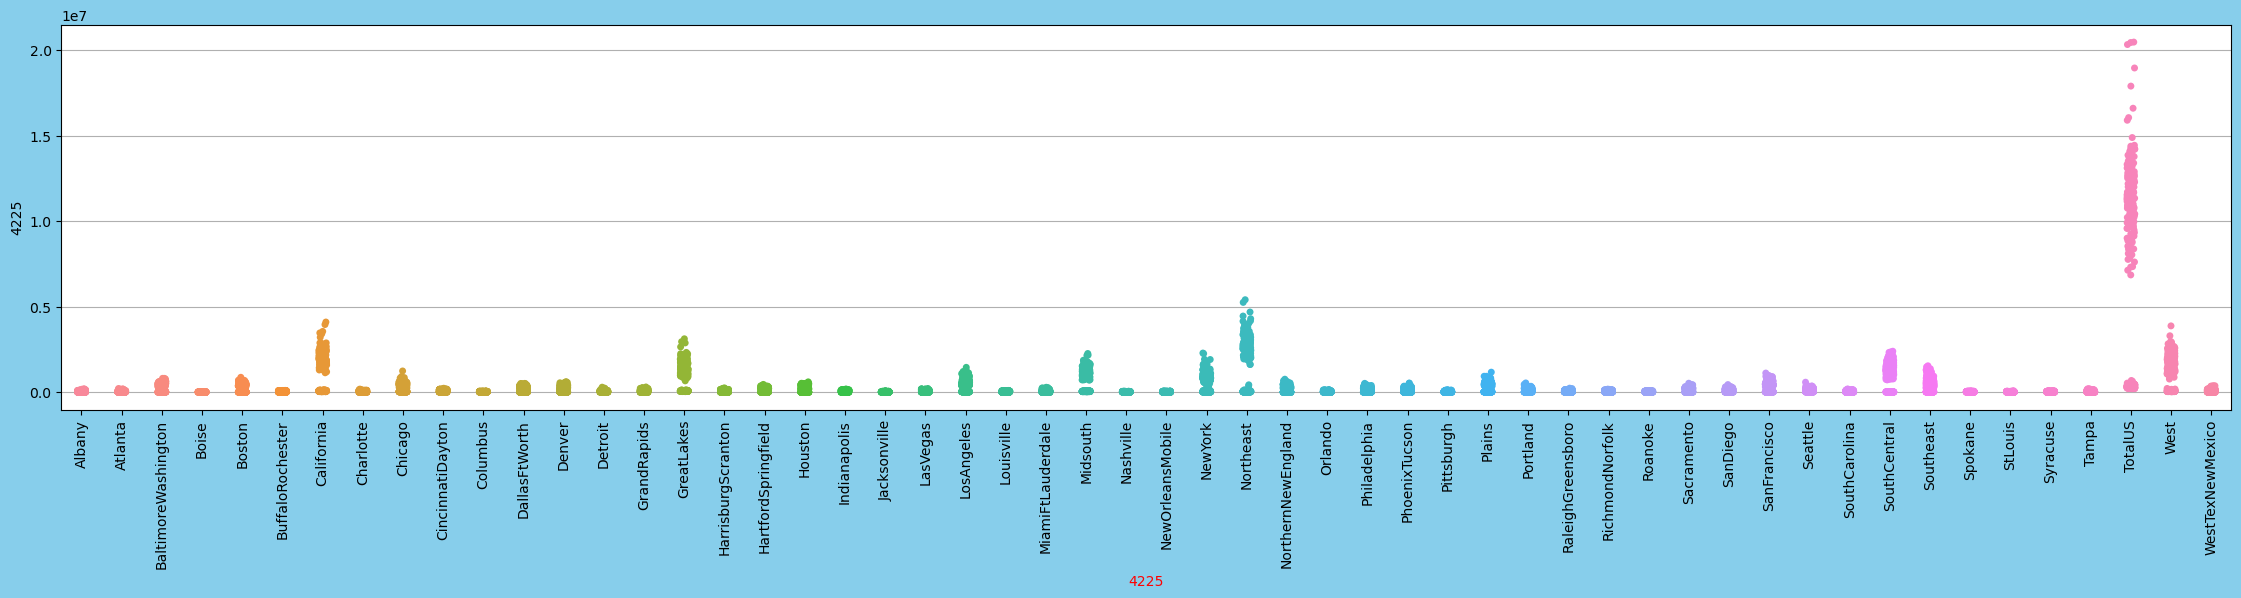

In [28]:
plt.figure(figsize=(28, 5), facecolor="skyblue")
sns.stripplot(y ='4225', x='region', data = df)
plt.xlabel('4225',color = 'r')
plt.xticks(rotation=90)
plt.grid(axis ='y')
plt.show()

we see then plot we can see that california,GreatLakes,LosAngles,Midsouth,NOrtheast,Southcentral,Southeast,west has  comparitevely more 4225 type of avocados

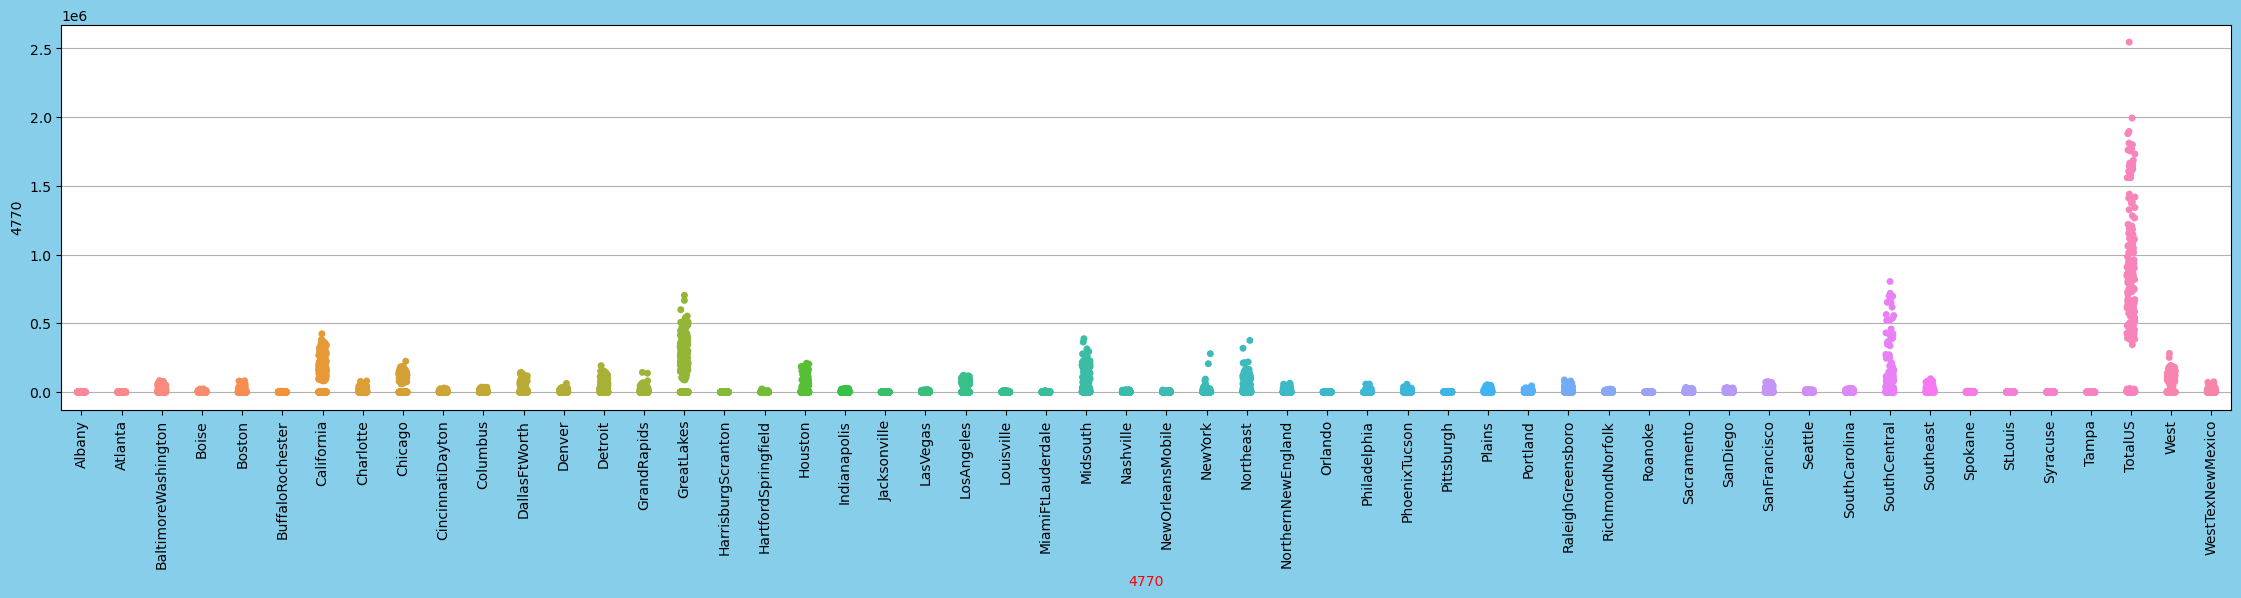

In [29]:
plt.figure(figsize=(28, 5), facecolor="skyblue")
sns.stripplot(y ='4770', x='region', data = df)
plt.xlabel('4770',color = 'r')
plt.xticks(rotation=90)
plt.grid(axis ='y')
plt.show()

we see then plot we can see that california,GreatLakes,Huston,Midsouth,NOrtheast,Southcentral,Southeast,west has  comparitevely more 4770 type of avocados

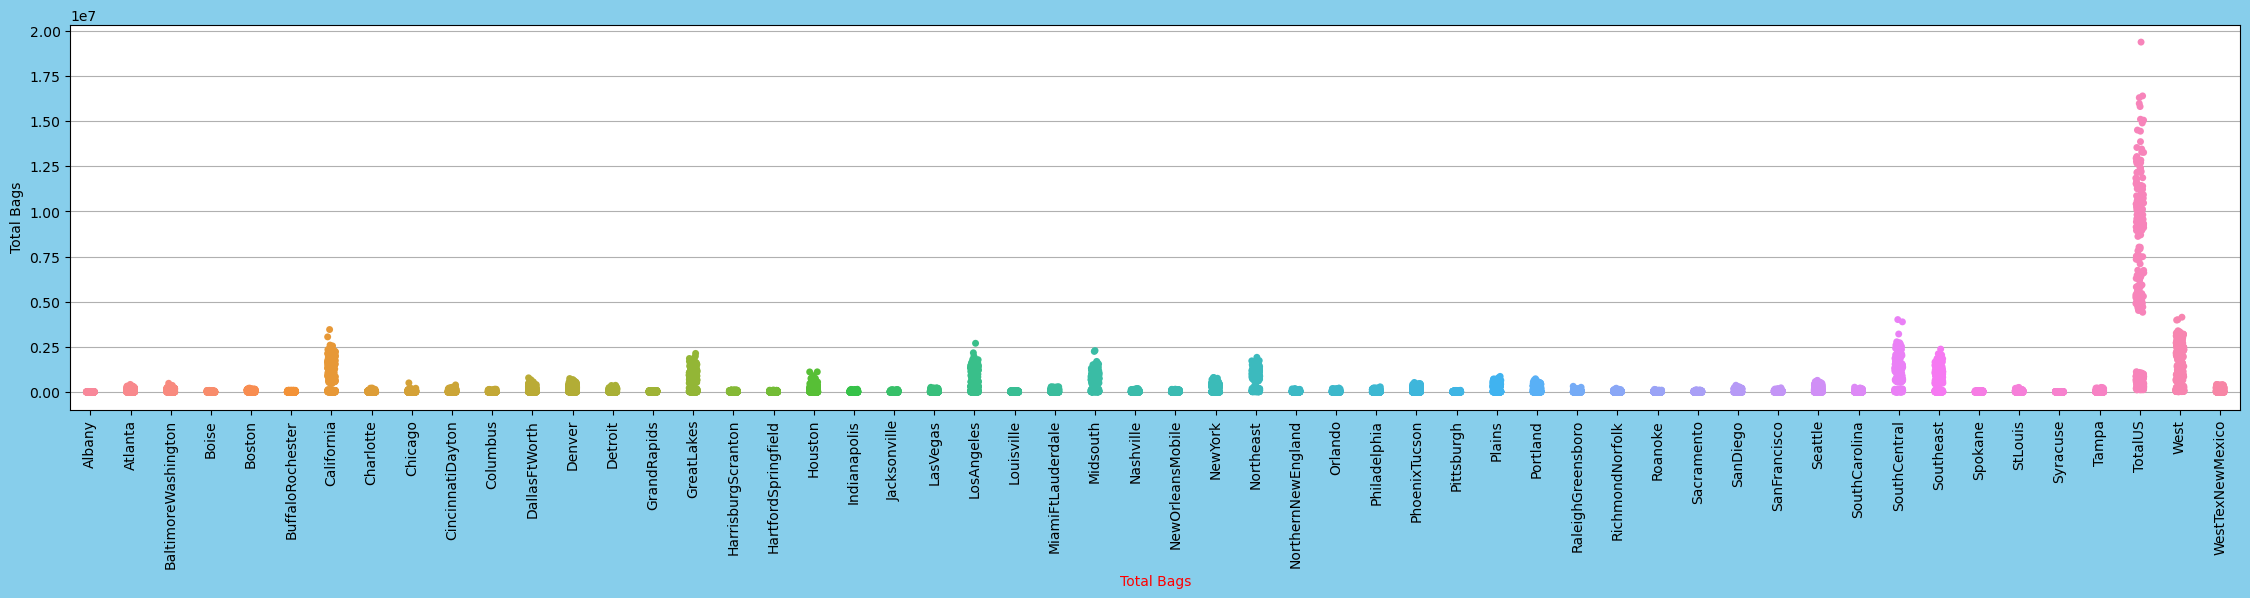

In [30]:
plt.figure(figsize=(28, 5), facecolor="skyblue")
sns.stripplot(y ='Total Bags', x='region', data = df)
plt.xlabel('Total Bags',color = 'r')
plt.xticks(rotation=90)
plt.grid(axis ='y')
plt.show()

we see then plot we can see that california,GreatLakes,LosAngles,Midsouth,NOrtheast,Southcentral,Southeast,west has  comparitevely more Total Bags s of avocados

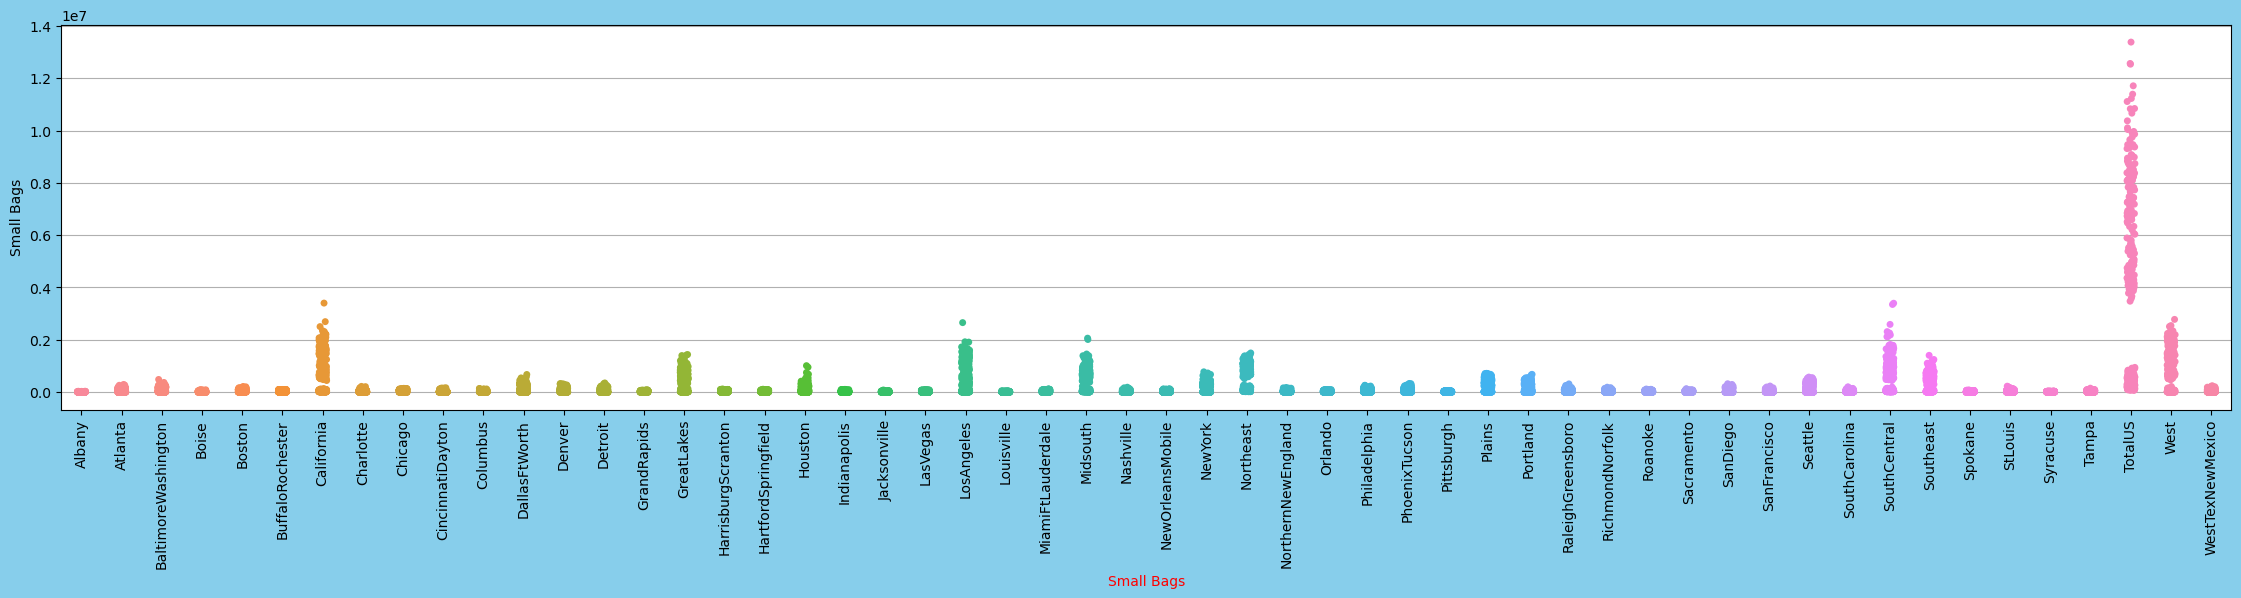

In [31]:
plt.figure(figsize=(28, 5), facecolor="skyblue")
sns.stripplot(y ='Small Bags', x='region', data = df)
plt.xlabel('Small Bags',color = 'r')
plt.xticks(rotation=90)
plt.grid(axis ='y')
plt.show()

we see then plot we can see that california,GreatLakes,LosAngles,Midsouth,NOrtheast,Southcentral,Southeast,west has  comparitevely more Small bags of avocados

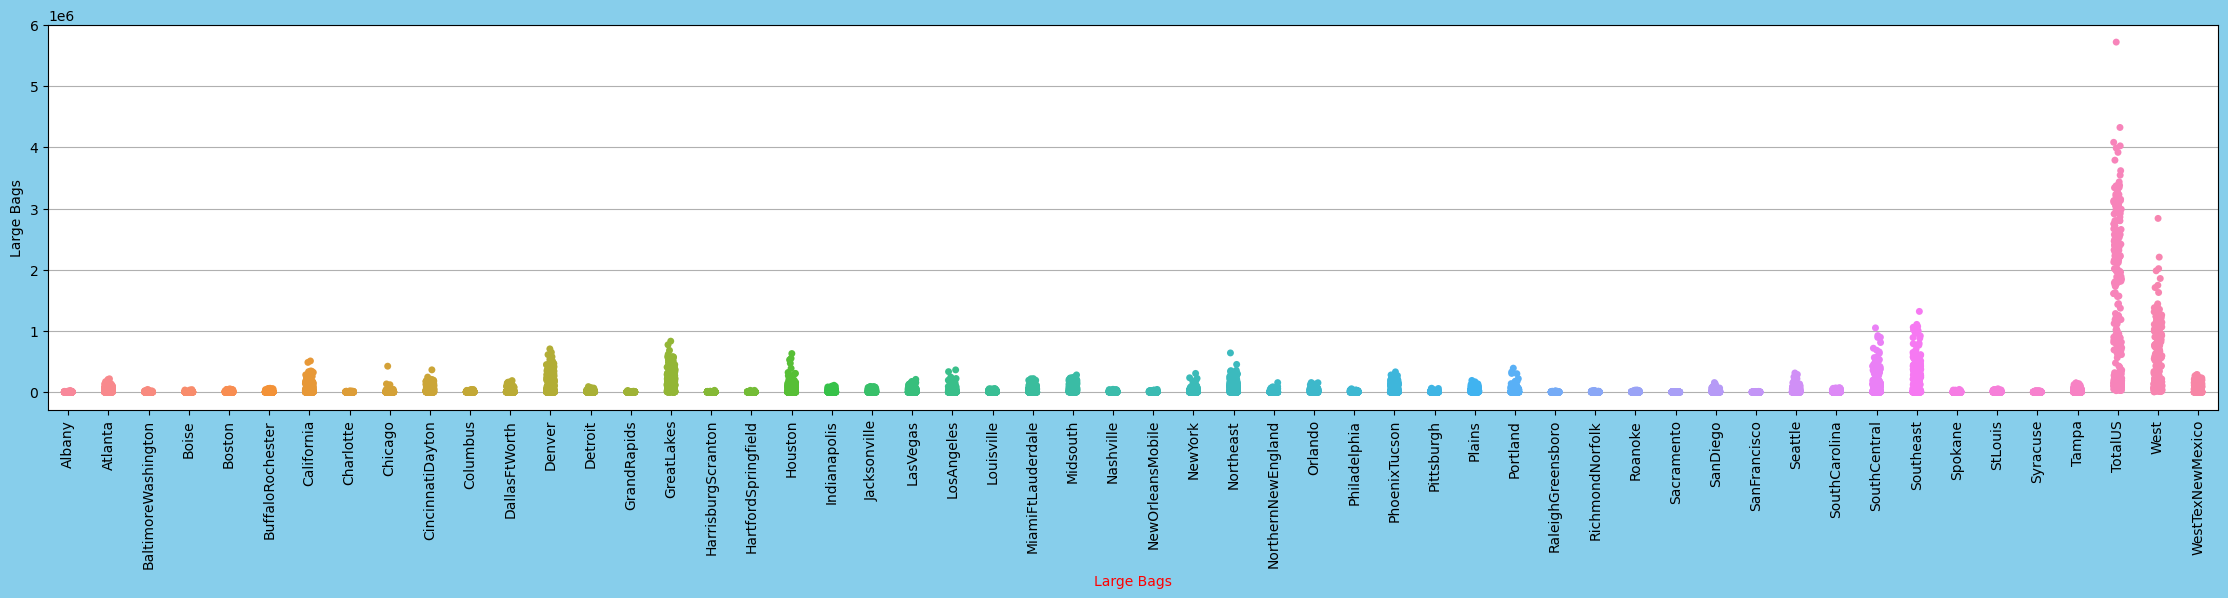

In [32]:
plt.figure(figsize=(28, 5), facecolor="skyblue")
sns.stripplot(y ='Large Bags', x='region', data = df)
plt.xlabel('Large Bags',color = 'r')
plt.xticks(rotation=90)
plt.grid(axis ='y')
plt.show()

we see then plot we can see that Denver,GreatLakes,LosAngles,Midsouth,NOrtheast,Southcentral,Southeast,west has  comparitevely more Large Bags  of avocados

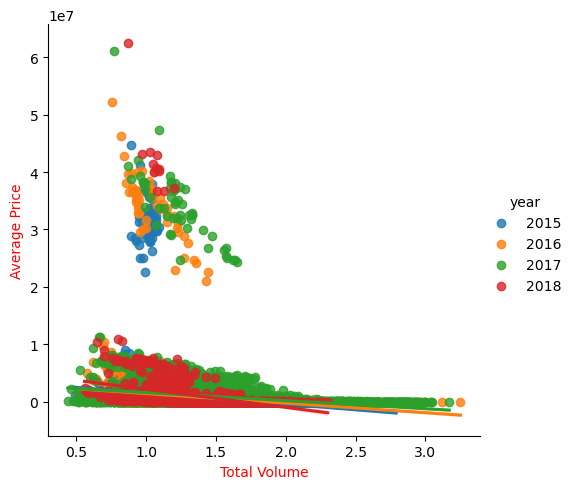

In [41]:
sns.lmplot(y ='Total Volume', x='AveragePrice', data = df, hue = 'year')
plt.xlabel('Total Volume',color = 'r')
plt.ylabel('Average Price',color='r')
plt.show()

here  in the plot we can not see a signifcant relationship

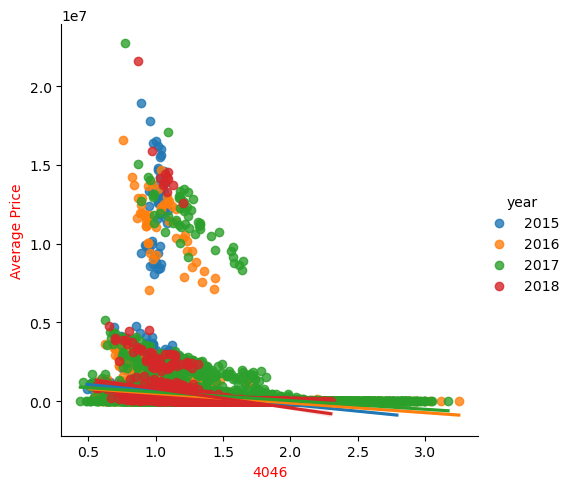

In [43]:
sns.lmplot(y ='4046', x='AveragePrice', data = df, hue = 'year')
plt.xlabel('4046',color = 'r')
plt.ylabel('Average Price',color='r')
plt.show()

here  in the plot we can not see a signifcant relationship

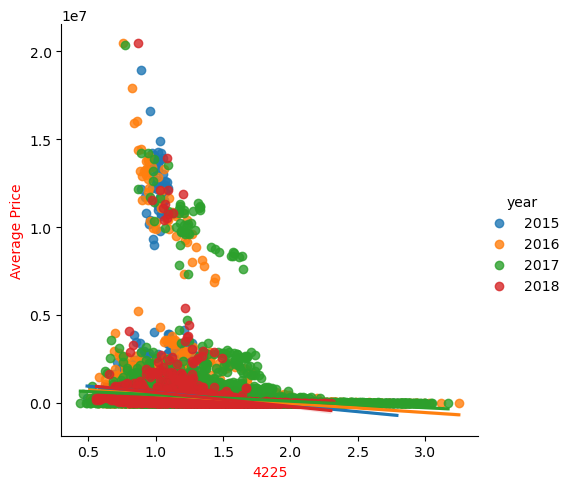

In [44]:
sns.lmplot(y ='4225', x='AveragePrice', data = df, hue = 'year')
plt.xlabel('4225',color = 'r')
plt.ylabel('Average Price',color='r')
plt.show()

here  in the plot we can not see a signifcant relationship

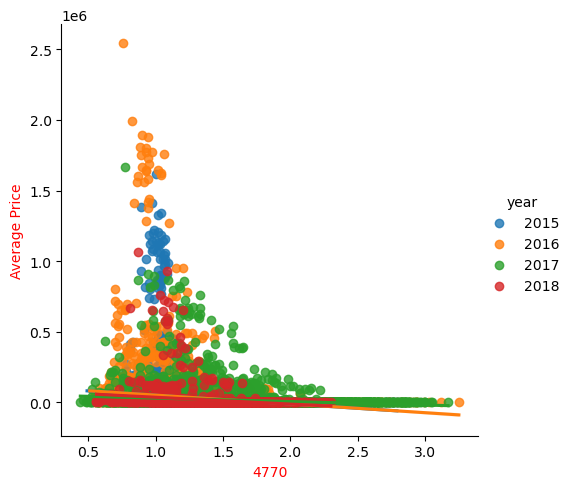

In [45]:
sns.lmplot(y ='4770', x='AveragePrice', data = df, hue = 'year')
plt.xlabel('4770',color = 'r')
plt.ylabel('Average Price',color='r')
plt.show()

here  in the plot we can not see a signifcant relationship

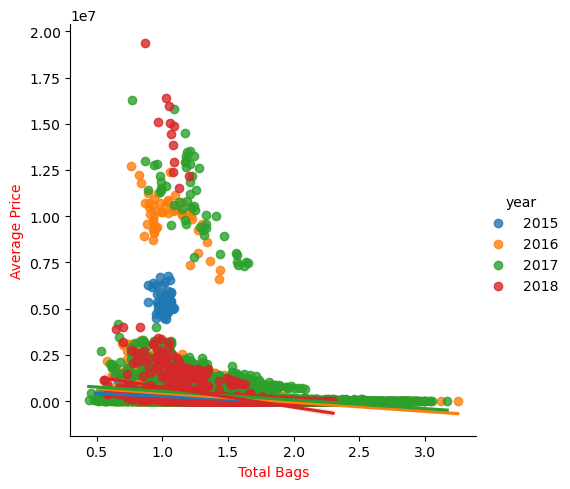

In [46]:
sns.lmplot(y ='Total Bags', x='AveragePrice', data = df, hue = 'year')
plt.xlabel('Total Bags',color = 'r')
plt.ylabel('Average Price',color='r')
plt.show()

here  in the plot we can not see a signifcant relationship

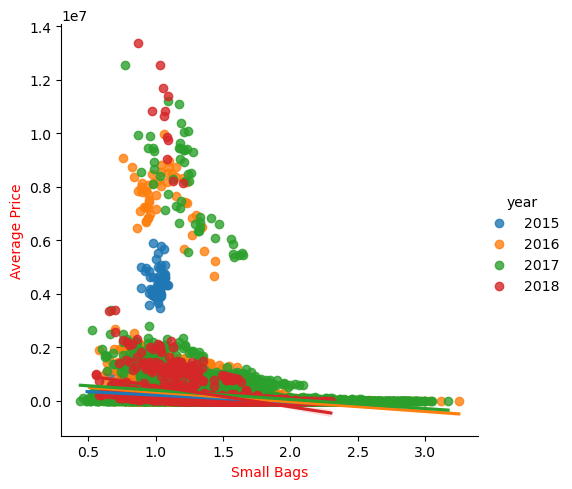

In [47]:
sns.lmplot(y ='Small Bags', x='AveragePrice', data = df, hue = 'year')
plt.xlabel('Small Bags',color = 'r')
plt.ylabel('Average Price',color='r')
plt.show()

here  in the plot we can not see a signifcant relationship

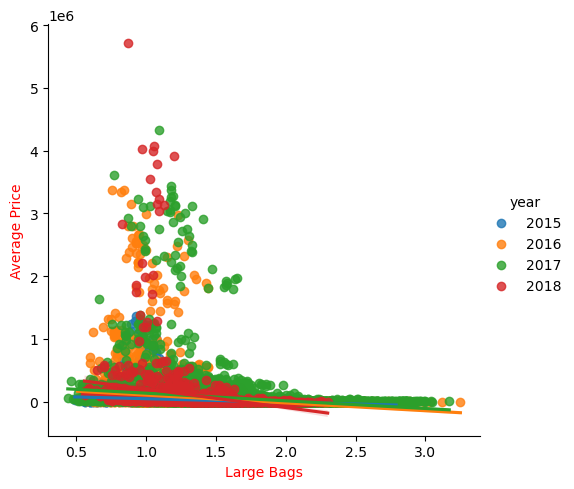

In [40]:
sns.lmplot(y ='Large Bags', x='AveragePrice', data = df, hue = 'year')
plt.xlabel('Large Bags',color = 'r')
plt.ylabel('Average Price',color='r')
plt.show()

here  in the plot we can not see a signifcant relationship

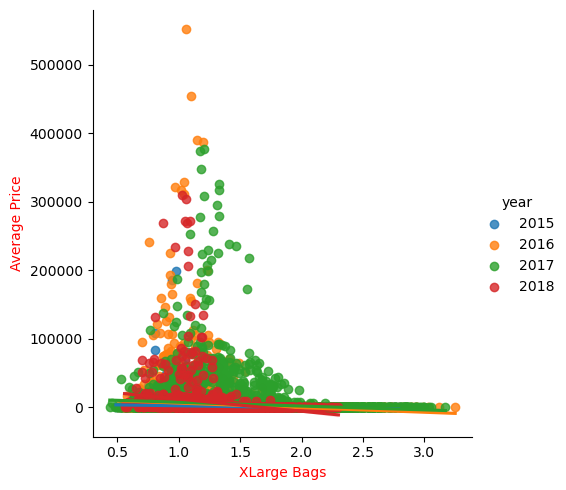

In [48]:
sns.lmplot(y ='XLarge Bags', x='AveragePrice', data = df, hue = 'year')
plt.xlabel('XLarge Bags',color = 'r')
plt.ylabel('Average Price',color='r')
plt.show()

here  in the plot we can not see a signifcant relationship

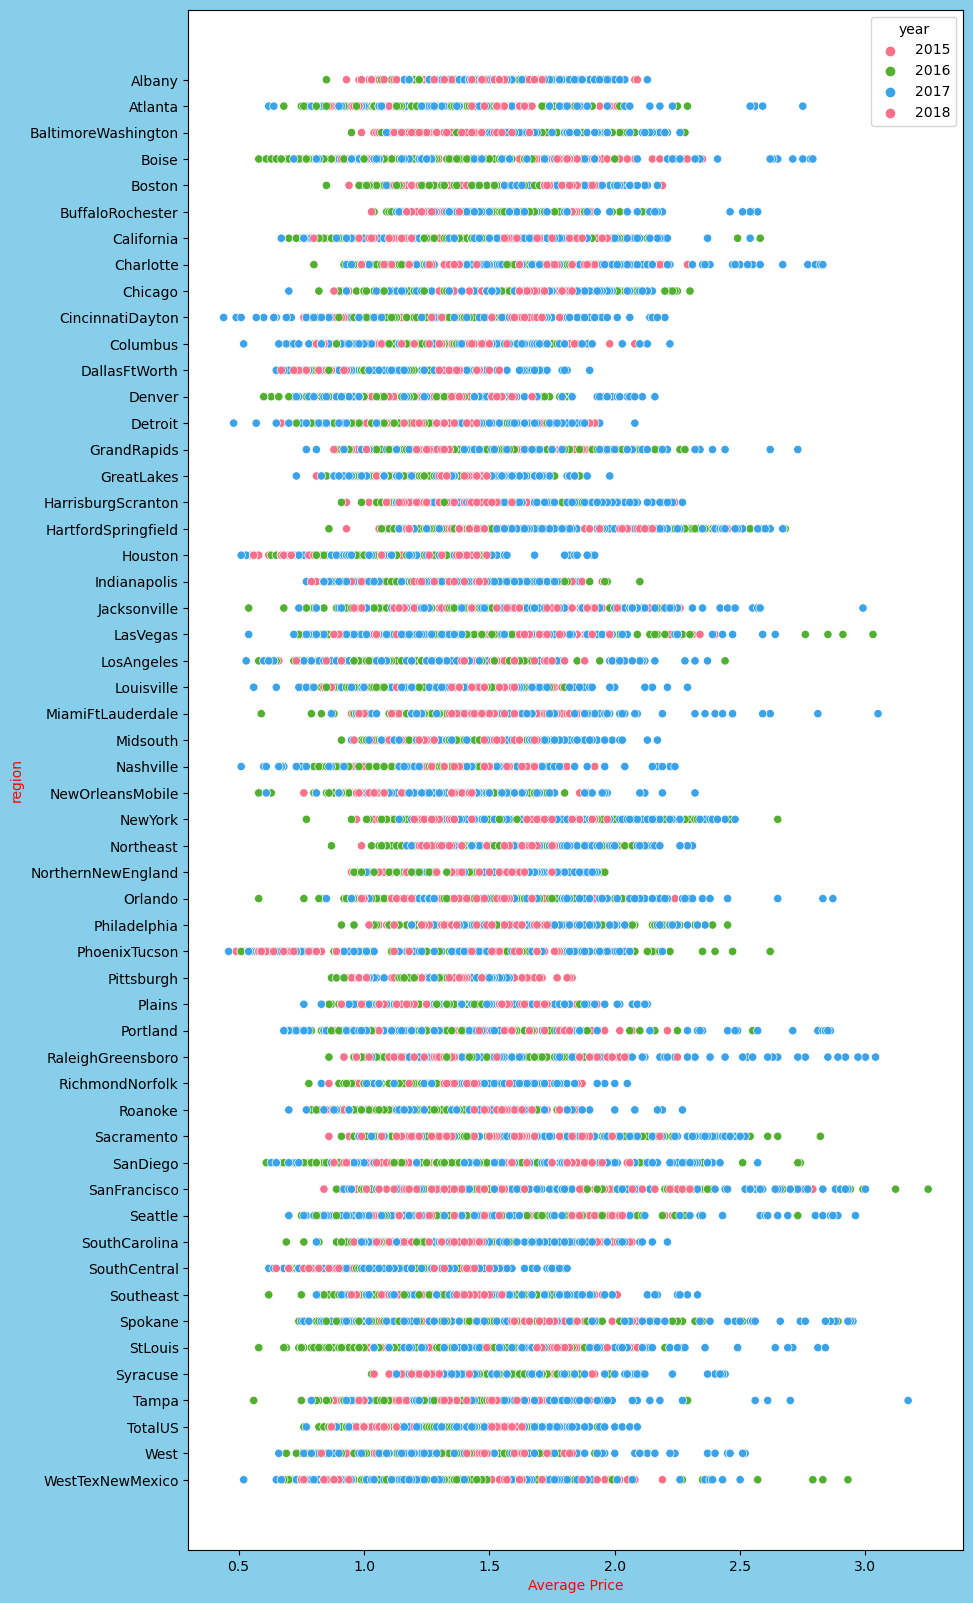

In [55]:
plt.figure(figsize=(10, 20), facecolor="skyblue")
sns.scatterplot(y ='region', x='AveragePrice', data = df, hue = 'year',palette='husl')
plt.ylabel('region',color = 'r')
plt.xlabel('Average Price',color='r')
plt.show()

here we can observe that average price of one avocado are higher in 2017 than any of the year for all the region

### -- Checking for Outliers

In [56]:
df1 = df.drop(['Date','type','year','region'],axis=1)

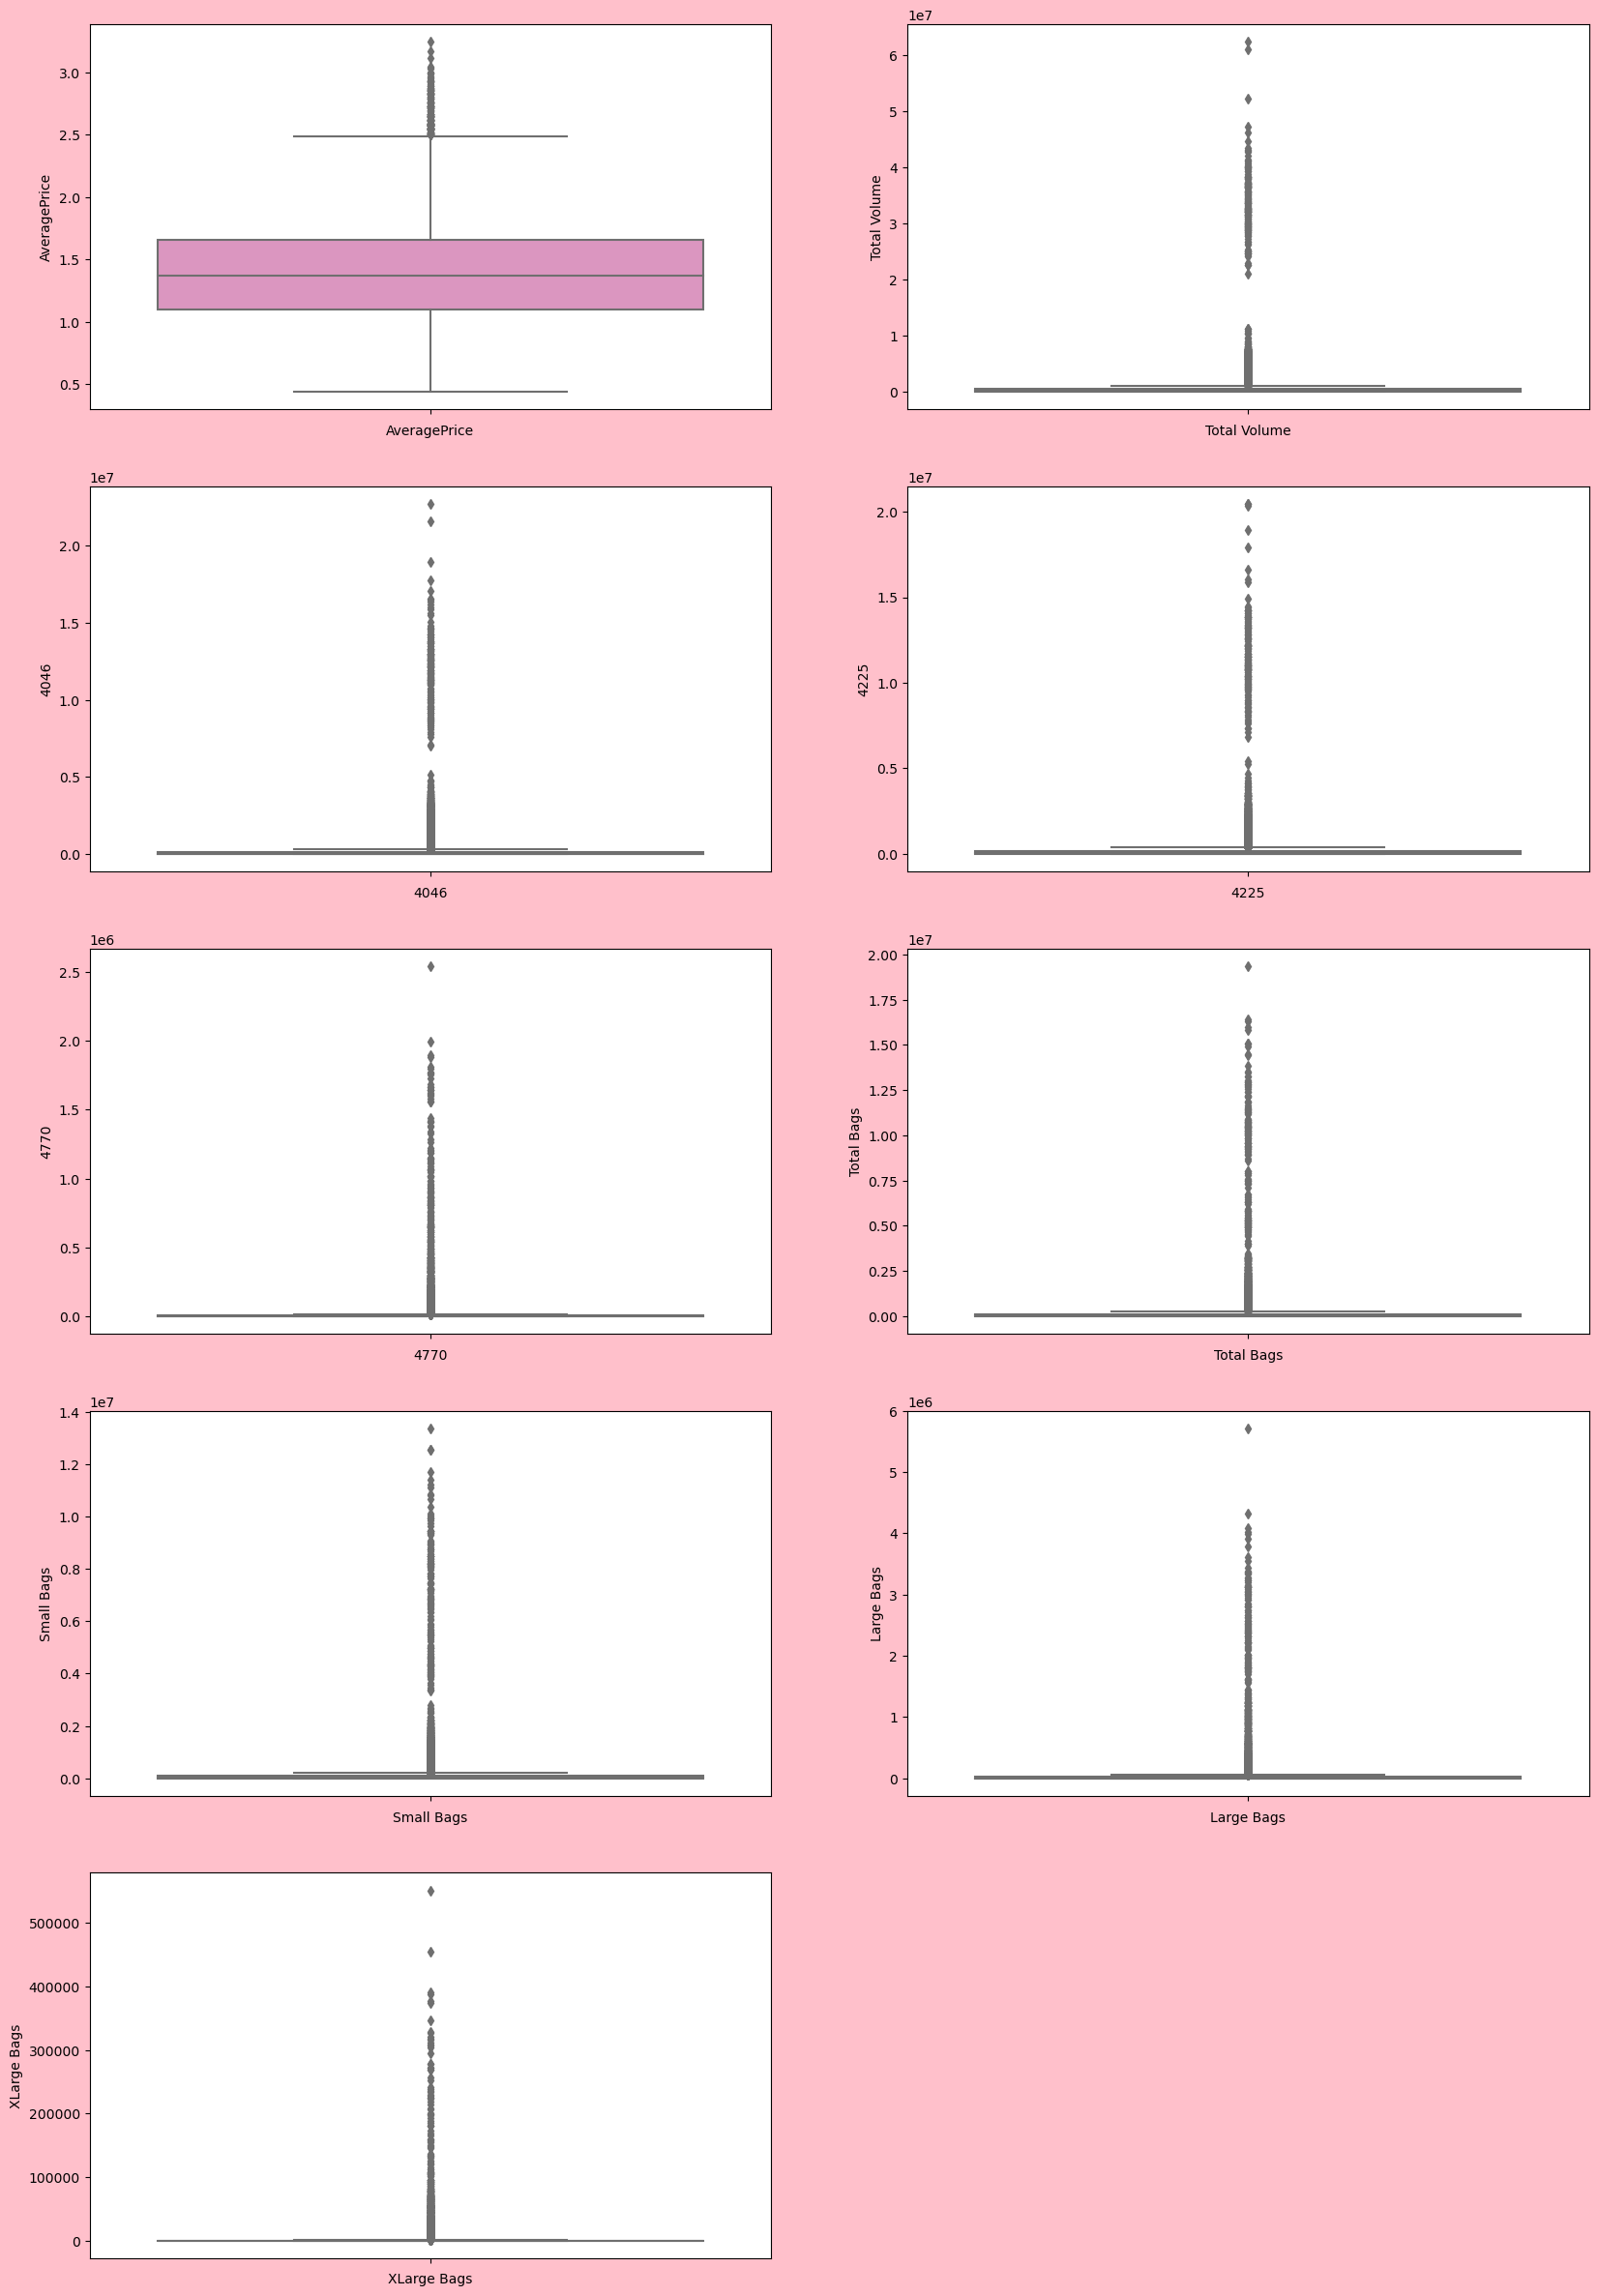

In [57]:
plt.figure(figsize=(20, 30), facecolor="pink")
plotnumber = 1


for i in df1: 
    if plotnumber <= 9:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot( y = df1[i] , palette = 'Set2_r')
        plt.xlabel(i)
    plotnumber += 1
    

plt.show()

we can see from above boxplot that most of the features have outliers we will remove outliers to remove the outliers

In [58]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [59]:
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [60]:
df3= df[(z<3).all(axis=1)]

In [61]:
df3.shape

(17651, 13)

In [62]:
print('percentage of dataloss',((df.shape[0]-df3.shape[0])/df.shape[0])*100)

percentage of dataloss 3.276891884486821


In [63]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df2 = df[~((df < (Q1-1.5*IQR)) |(df> (Q3 + 1.5*IQR))).any(axis=1)]

In [64]:
print('percentage of dataloss',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

percentage of dataloss 36.774617787276014


#### herein z-score data loss is 3.27% , as there is so much outliers in our data we accept it and further proceeds 

In [65]:
df= df3

In [66]:
df.reset_index(inplace=True, drop=True)

### -- Checking for Skewness

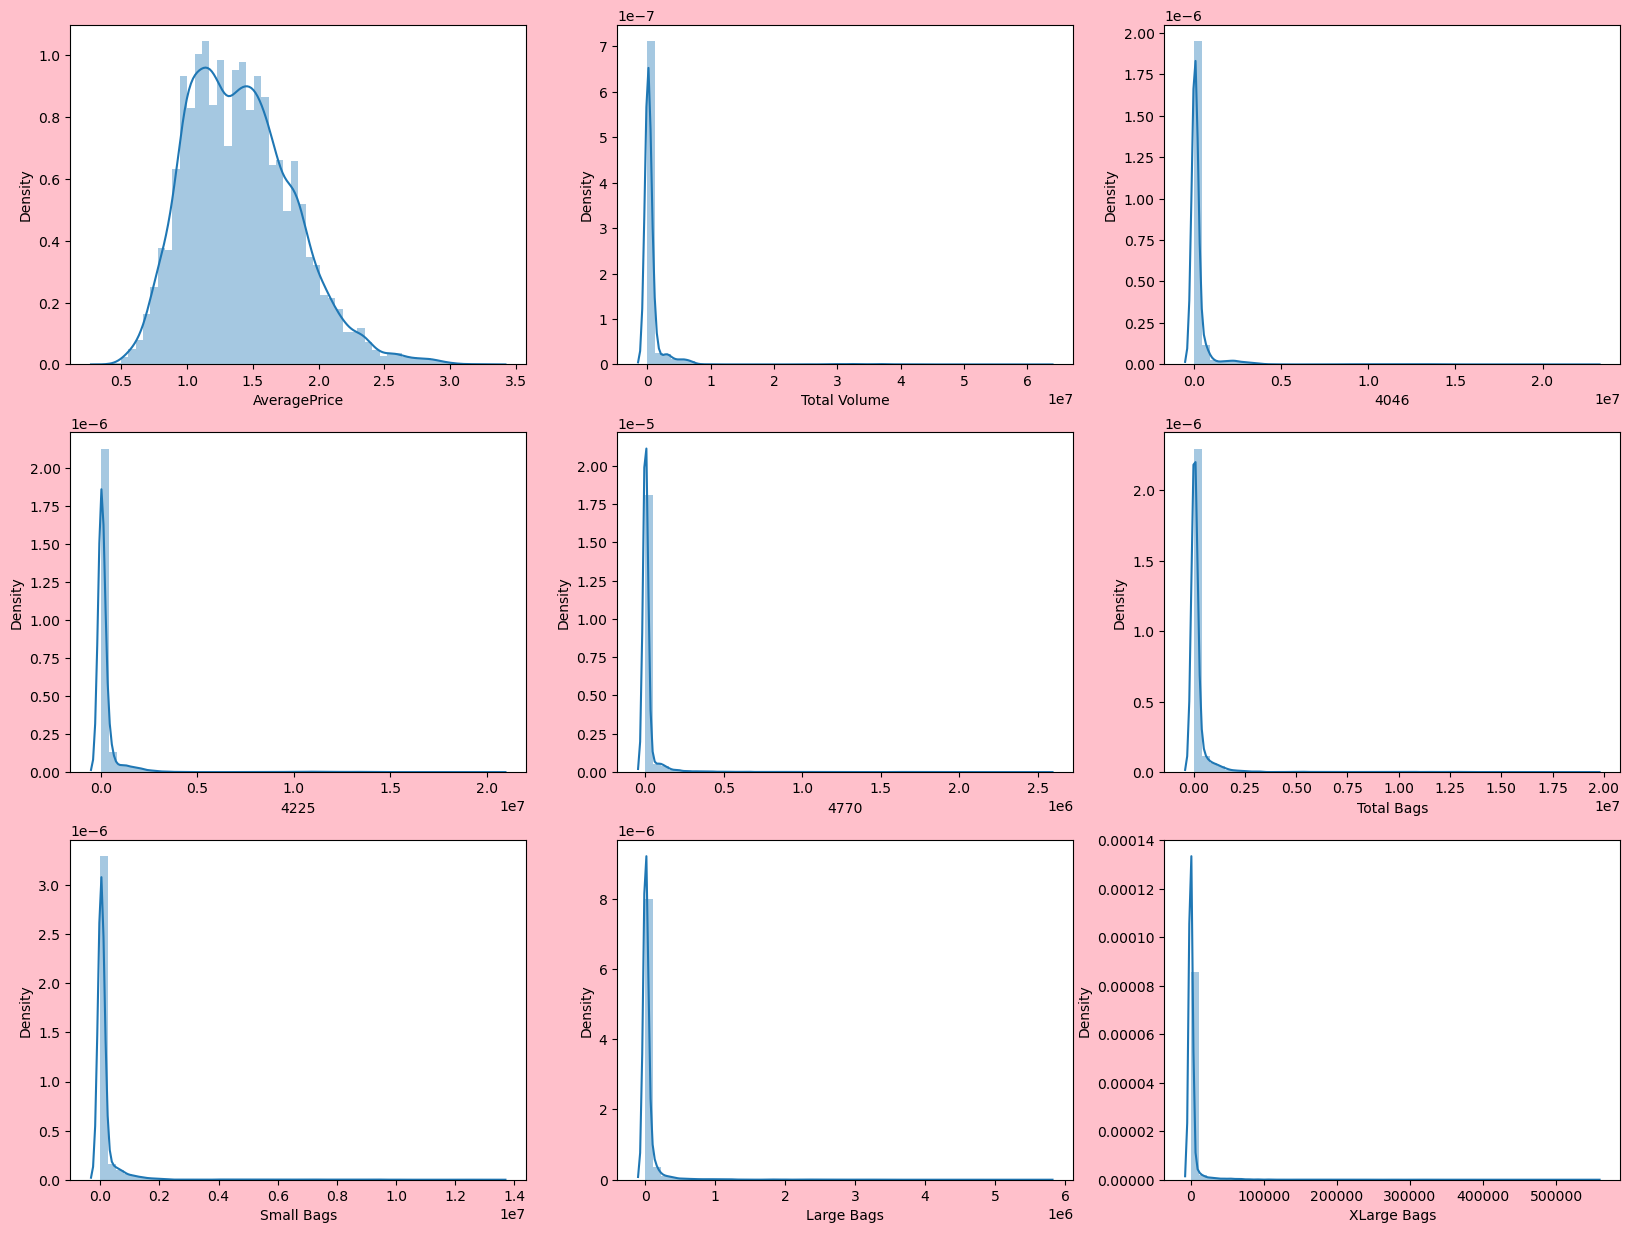

In [67]:
plt.figure(figsize=(20, 15), facecolor="pink")
plotnumber = 1

for i in df1:  
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df1[i])
        plt.xlabel(i, fontsize=10)
    plotnumber += 1

plt.show()

In [68]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
dtype: float64

In [69]:
df['Total Volume']=np.cbrt(df['Total Volume'])

In [70]:
df['4046']=np.cbrt(df['4046'])
df['4225']=np.cbrt(df['4225'])
df['4770']=np.cbrt(df['4770'])
df['Total Bags']=np.cbrt(df['Total Bags'])
df['Small Bags']=np.cbrt(df['Small Bags'])
df['Large Bags']=np.cbrt(df['Large Bags'])
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])

In [71]:
df.skew()

AveragePrice    0.377432
Total Volume    1.240435
4046            1.555876
4225            1.277025
4770            1.635614
Total Bags      1.231831
Small Bags      1.246033
Large Bags      1.276213
XLarge Bags     2.277028
year            0.229976
dtype: float64

In [72]:
df['Total Volume']=np.sqrt(df['Total Volume'])
df['4046'] = np.sqrt(df['4046'])
df['4225'] = np.sqrt(df['4225'])
df['4770'] = np.sqrt(df['4770'])
df['Total Bags'] = np.sqrt(df['Total Bags'])
df['Small Bags'] = np.sqrt(df['Small Bags'])
df['Large Bags'] = np.sqrt(df['Large Bags'])
df['XLarge Bags'] = np.sqrt(df['XLarge Bags'])

In [73]:
df.skew()

AveragePrice    0.377432
Total Volume    0.551005
4046            0.570377
4225            0.384279
4770            0.411758
Total Bags      0.436523
Small Bags      0.273120
Large Bags      0.018991
XLarge Bags     1.308244
year            0.229976
dtype: float64

here we remove the skewness from the dataset

### checking for correlation 

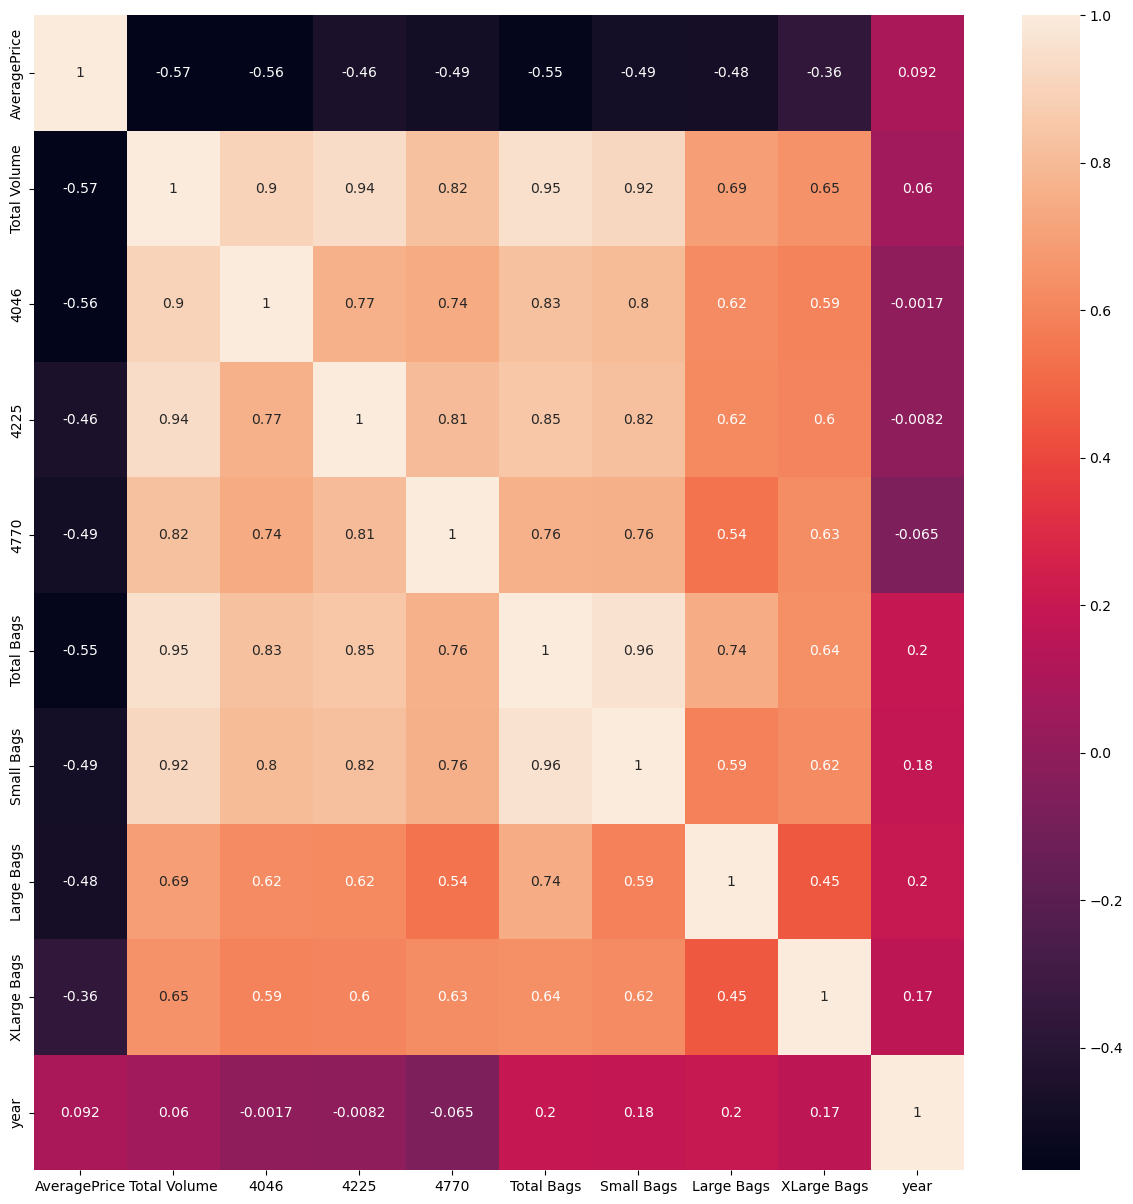

In [74]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation , annot = True)
plt.show()

here in our corerlation matrix we can observe that most of the features have high correlation with other features that can cause the problem of multicollinearity we will check later in the project 

# first we take region as target variable 

### Seperating features and target variable

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


In [76]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,6.328447,3.181351,6.156579,1.907426,4.534825,4.526684,2.129486,0.0,0,2015,0
1,50,1.35,6.164507,2.961238,5.955965,1.969316,4.602526,4.594625,2.145326,0.0,0,2015,0
2,49,0.93,7.005653,3.043457,6.913061,2.252173,4.485577,4.476060,2.165565,0.0,0,2015,0
3,48,1.08,6.550342,3.228304,6.449584,2.042378,4.240110,4.223686,2.261454,0.0,0,2015,0
4,47,1.28,6.090476,3.130655,5.938031,2.057118,4.284278,4.261141,2.413593,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,161,1.63,5.074494,3.563293,3.394252,0.000000,4.879573,4.853201,2.749300,0.0,1,2018,53
17647,160,1.71,4.902755,3.256076,3.883715,0.000000,4.582892,4.555715,2.621819,0.0,1,2018,53
17648,159,1.87,4.895593,3.256176,3.672344,2.999273,4.593488,4.590034,1.866697,0.0,1,2018,53
17649,158,1.93,5.030477,3.393671,3.793685,2.998634,4.713730,4.710143,1.919383,0.0,1,2018,53


### Seperating features and target variable

In [77]:
X=  df.drop(['Date','region'], axis = 1)
Y=df['region'] 

### Scaling using Standard Scalar

In [78]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.195352,-0.232954,-0.718275,0.260411,-0.272787,-0.602504,-0.403834,-0.698244,-0.627128,-1.019047,-1.210013
1,-0.143510,-0.299158,-0.805669,0.173711,-0.243973,-0.567641,-0.369754,-0.690974,-0.627128,-1.019047,-1.210013
2,-1.232207,0.040527,-0.773025,0.587342,-0.112283,-0.627864,-0.429227,-0.681685,-0.627128,-1.019047,-1.210013
3,-0.843387,-0.143344,-0.699633,0.387040,-0.209957,-0.754266,-0.555821,-0.637675,-0.627128,-1.019047,-1.210013
4,-0.324959,-0.329055,-0.738404,0.165960,-0.203095,-0.731522,-0.537033,-0.567849,-0.627128,-1.019047,-1.210013
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.739345,-0.566628,-0.933392,-1.160830,-0.424977,-0.240049,-0.413771,-0.627128,0.981309,1.980756
17647,0.789660,-0.808700,-0.688606,-0.721859,-1.160830,-0.577752,-0.389271,-0.472280,-0.627128,0.981309,1.980756
17648,1.204402,-0.811592,-0.688566,-0.813208,0.235545,-0.572295,-0.372057,-0.818855,-0.627128,0.981309,1.980756
17649,1.359930,-0.757121,-0.633975,-0.760768,0.235248,-0.510377,-0.311809,-0.794674,-0.627128,0.981309,1.980756


### Checking for VIF

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif
                                                                         

,VIF values,Features
0,2.082093,AveragePrice
1,91.807043,Total Volume
2,10.394627,4046
3,19.232603,4225
4,3.898234,4770
5,47.146031,Total Bags
6,21.887043,Small Bags
7,3.913856,Large Bags
8,2.011344,XLarge Bags
9,3.548482,type


In [80]:
X = X.drop(['Total Volume'], axis = 1)

In [81]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,2.020148,AveragePrice
1,3.943356,4046
2,5.288386,4225
3,3.897769,4770
4,35.396424,Total Bags
5,21.751173,Small Bags
6,3.886053,Large Bags
7,2.010081,XLarge Bags
8,3.541164,type
9,1.430932,year


In [82]:
X = X.drop(['Total Bags'], axis = 1)

In [83]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,1.897490,AveragePrice
1,3.903106,4046
2,4.811623,4225
3,3.897435,4770
4,4.829880,Small Bags
5,2.077142,Large Bags
6,1.999283,XLarge Bags
7,3.469089,type
8,1.397066,year


here we remove factors which has high VIF

## Creating train test Split

In [84]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (X,Y, test_size = 0.25 , random_state = i)

#### importing necessary libraries for models

In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

#### AdaBoostClassifier

In [86]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
y_pred = abc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.07153648587399909


In [87]:
y_pred_testABC  = abc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testABC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.06344890097439383


#### RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [50]:
y_pred_testRFC  = rfc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testRFC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9986403806934059


#### LogisticRegression 

In [51]:
log_R =LogisticRegression()
log_R.fit(X_train, Y_train)
y_pred = log_R.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8410636047741351


In [52]:
y_pred_testLR  = log_R.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testLR ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8352594606843418


#### SVC

In [53]:
SVM = SVC()
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9709925970690436


In [54]:
y_pred_testSVM  = SVM.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testSVM ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9630636755041921


#### GradientBoostingClassifier 

In [55]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
y_pred = GBC.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [56]:
y_pred_testGBC  = GBC.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testGBC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9995467935644686


#### KNN

In [57]:
KNN =KNeighborsClassifier()
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.968575313491464


In [58]:
y_pred_testKNN  = KNN.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testKNN ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9472014502605937


## Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
cscore1 = cross_val_score(rfc,X,Y)
print('Cscore for RandomForest Classifier-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testRFC)-cscore1.mean())

Cscore for RandomForest Classifier->  [0.97451147 0.99461756 0.99320113 0.98441926 0.93087819]
mean of cscore->  0.9755255234294709
difference between accuracy and cross validation score is 0.02311485726393503


In [61]:
cscore2 = cross_val_score(KNN,X,Y)
print('Cscore for Kneighbours Classifier ',cscore2)
print('mean of cscore-> ',cscore2.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testKNN)-cscore2.mean())

Cscore for Kneighbours Classifier  [0.77286888 0.73116147 0.78611898 0.6878187  0.63087819]
mean of cscore->  0.7217692425566191
difference between accuracy and cross validation score is 0.22543220770397454


In [62]:
cscore3 = cross_val_score(abc,X,Y)
print('Cscore for AdaBoost Classifier-> ',cscore3)
print('mean of cscore-> ',cscore3.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testABC)-cscore3.mean())

Cscore for AdaBoost Classifier->  [0.23392807 0.22492918 0.27903683 0.28640227 0.18583569]
mean of cscore->  0.2420264063418865
difference between accuracy and cross validation score is 0.020380119830785137


In [63]:
cscore4 = cross_val_score(GBC,X,Y)
print('Cscore for Gradient Boost Classifier -> ',cscore4)
print('mean of cscore-> ',cscore4.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testGBC)-cscore4.mean())

Cscore for Gradient Boost Classifier ->  [1. 1. 1. 1. 1.]
mean of cscore->  1.0
difference between accuracy and cross validation score is -0.0004532064355313725


In [64]:
cscore5 = cross_val_score(SVM,X,Y)
print('Cscore for SUpport Vector Machine-> ',cscore5)
print('mean of cscore-> ',cscore5.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testSVM)-cscore5.mean())

Cscore for SUpport Vector Machine->  [0.87085811 0.9101983  0.92011331 0.89405099 0.74787535]
mean of cscore->  0.8686192148377423
difference between accuracy and cross validation score is 0.09444446066644985


In [65]:
cscore6 = cross_val_score(log_R,X,Y)
print('Cscore for Logistic Regression',cscore6)
print('mean of cscore-> ',cscore6.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testLR)-cscore6.mean())

Cscore for Logistic Regression [0.76408949 0.68583569 0.80453258 0.74560907 0.54305949]
mean of cscore->  0.7086252640513846
difference between accuracy and cross validation score is 0.12663419663295716


here based on the Cscore we choose GradientBoost classifier

## Hyper parameter tuning

In [66]:
GBC.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [67]:
# Choosing parameters for our grid search CV
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0],
    'criterion': ['friedman_mse', 'squared_error']
}


In [68]:
GSC = GridSearchCV(GradientBoostingClassifier(),parameters,cv= 5)

In [70]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]})

In [71]:
GSC.best_params_ 

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 50,
 'subsample': 0.8}

In [76]:
GBC_final = GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.1, n_estimators = 50, loss = 'deviance' , subsample=0.8 )
GBC_final.fit(X_train, Y_train)
y_pred = GBC_final.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [77]:
y_pred_testGBC  = GBC_final.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testGBC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.9995467935644686


here we can see that after hyperparameter tuning GBC valuesd increases slightly

## Model Saving

In [78]:
import joblib
joblib.dump(GBC_final,'model for avocado (region)')

['model for avocado (region)']

# Prediction 

In [79]:
mymodel = joblib.load('model for avocado (region)')
prdt = mymodel.predict(X_test)
prdt

array([11, 35,  5, ..., 42,  9, 33])

In [80]:
Orginal = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':Orginal})
data1

,predicted,original
0,11,11
1,35,35
2,5,5
3,47,47
4,0,0
...,...,...
4408,31,31
4409,37,37
4410,42,42
4411,9,9


here we can see that our model predicted approx all the values 

# taking average price 

### Seperating features and target variable

In [29]:
X1=  df.drop(['Date','AveragePrice'], axis = 1)
Y1=df['AveragePrice'] 

### Scaling using Standard Scalar

In [30]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X1 = pd.DataFrame(SS.fit_transform(X1), columns = X1.columns)
X1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.232954,-0.718275,0.260411,-0.272787,-0.602504,-0.403834,-0.698244,-0.627128,-1.019047,-1.210013,-1.695495
1,-0.299158,-0.805669,0.173711,-0.243973,-0.567641,-0.369754,-0.690974,-0.627128,-1.019047,-1.210013,-1.695495
2,0.040527,-0.773025,0.587342,-0.112283,-0.627864,-0.429227,-0.681685,-0.627128,-1.019047,-1.210013,-1.695495
3,-0.143344,-0.699633,0.387040,-0.209957,-0.754266,-0.555821,-0.637675,-0.627128,-1.019047,-1.210013,-1.695495
4,-0.329055,-0.738404,0.165960,-0.203095,-0.731522,-0.537033,-0.567849,-0.627128,-1.019047,-1.210013,-1.695495
...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.739345,-0.566628,-0.933392,-1.160830,-0.424977,-0.240049,-0.413771,-0.627128,0.981309,1.980756,1.747054
17647,-0.808700,-0.688606,-0.721859,-1.160830,-0.577752,-0.389271,-0.472280,-0.627128,0.981309,1.980756,1.747054
17648,-0.811592,-0.688566,-0.813208,0.235545,-0.572295,-0.372057,-0.818855,-0.627128,0.981309,1.980756,1.747054
17649,-0.757121,-0.633975,-0.760768,0.235248,-0.510377,-0.311809,-0.794674,-0.627128,0.981309,1.980756,1.747054


### Checking for VIF

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X1.values,i)for i in range(len(X1.columns))]
vif['Features'] = X1.columns
vif
    

,VIF values,Features
0,90.222655,Total Volume
1,10.895477,4046
2,17.840293,4225
3,3.898340,4770
4,46.653733,Total Bags
5,21.079779,Small Bags
6,3.908104,Large Bags
7,2.014355,XLarge Bags
8,3.012605,type
9,1.380183,year


In [32]:
X1 = X1.drop(['Total Volume'], axis = 1)

In [33]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X1.values,i)for i in range(len(X1.columns))]
vif['Features'] = X1.columns
vif

,VIF values,Features
0,4.092091,4046
1,4.955063,4225
2,3.897289,4770
3,33.252488,Total Bags
4,21.036052,Small Bags
5,3.884729,Large Bags
6,2.014351,XLarge Bags
7,2.972946,type
8,1.361922,year
9,1.082998,region


In [34]:
X1 = X1.drop(['Total Bags'], axis = 1)

In [35]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X1.values,i)for i in range(len(X1.columns))]
vif['Features'] = X1.columns
vif

,VIF values,Features
0,4.024845,4046
1,4.635998,4225
2,3.896457,4770
3,4.801882,Small Bags
4,1.925274,Large Bags
5,2.007759,XLarge Bags
6,2.966873,type
7,1.346798,year
8,1.082827,region


here we remove features which have more VIF

## creating train test split

In [36]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (X1,Y1, test_size = 0.25 , random_state = i)

#### importing necessary libraries for models

In [37]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor 
LR = LinearRegression()
LS= Lasso()
RIG= Ridge()
SVM=SVR()
RFR=RandomForestRegressor()
DTR = DecisionTreeRegressor()
abr = AdaBoostRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


## Models

#### Lasso

In [38]:
LS.fit(X_train, Y_train)
y_pred = LS.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.0


In [39]:
y_pred_testLS  = LS.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testLS ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> -0.0012036762477665164


In [40]:
mae = mean_absolute_error(Y_test, y_pred_testLS)
mse = mean_squared_error(Y_test, y_pred_testLS)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.3119502180221487
Mean Squared Error -->: 0.14434064861676452
Root Mean Squared Error-->: 0.3799218980484864


#### Ridge

In [41]:
RIG.fit(X_train, Y_train)
y_pred1 = RIG.predict(X_train)
R2_score = r2_score( Y_train,y_pred1 ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.4752203026940468


In [42]:
y_pred_testRIG  = RIG.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRIG ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.47519763890252786


In [43]:
mae = mean_absolute_error(Y_test, y_pred_testRIG)
mse = mean_squared_error(Y_test, y_pred_testRIG)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.21502159148441866
Mean Squared Error -->: 0.07565924396153811
Root Mean Squared Error-->: 0.2750622547016186


#### Support vector Regression (svm)

In [44]:
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.7318850896306317


In [45]:
y_pred_testSVM  = SVM.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testSVM ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.708544095420128


In [46]:
mae = mean_absolute_error(Y_test, y_pred_testSVM)
mse = mean_squared_error(Y_test, y_pred_testSVM)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.15234501745782128
Mean Squared Error -->: 0.042018357810977326
Root Mean Squared Error-->: 0.2049837988987845


#### LInear Regression

In [47]:
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.47522031499253337


In [48]:
y_pred_testLR  = LR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testLR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.4751920620442468


In [49]:
mae = mean_absolute_error(Y_test, y_pred_testLR)
mse = mean_squared_error(Y_test, y_pred_testLR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.215024185547735
Mean Squared Error -->: 0.07566004796112444
Root Mean Squared Error-->: 0.27506371618431324


#### DecisionTreeRegressor 

In [50]:
DTR.fit(X_train, Y_train)
y_pred = DTR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 1.0


In [51]:
y_pred_testDTR  = DTR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testDTR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.6962695426553079


In [52]:
mae = mean_absolute_error(Y_test, y_pred_testDTR)
mse = mean_squared_error(Y_test, y_pred_testDTR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.14188080670745523
Mean Squared Error -->: 0.04378794470881486
Root Mean Squared Error-->: 0.20925569217781118


#### AdaBoostRegressor

In [53]:
abr.fit(X_train, Y_train)
y_pred = abr.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.5159595680011444


In [54]:
y_pred_testABR  = abr.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testABR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.5059472583474643


In [55]:
mae = mean_absolute_error(Y_test, y_pred_testABR)
mse = mean_squared_error(Y_test, y_pred_testABR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.2135126219473124
Mean Squared Error -->: 0.0712261599440735
Root Mean Squared Error-->: 0.2668822960484144


#### RandoForestRegressor 

In [56]:
RFR.fit(X_train, Y_train)
y_pred = RFR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9782815339538204


In [57]:
y_pred_testRFR  = RFR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRFR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.8442075166087941


In [58]:
mae = mean_absolute_error(Y_test, y_pred_testRFR)
mse = mean_squared_error(Y_test, y_pred_testRFR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.10609143439836845
Mean Squared Error -->: 0.022460153349195554
Root Mean Squared Error-->: 0.1498671189727605


we will further understand which model is best predicting by using cross validation 

## Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score

In [67]:
cscore1 = cross_val_score(abr,X1,Y1)
print('Cscore for AdaBoost Regressor-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testABR)-cscore1.mean())

Cscore for AdaBoost Regressor->  [-1.02376392  0.12746127  0.46078103  0.05038581  0.10864394]
mean of cscore->  -0.05529837172778218
difference between R2 and cross validation score is 0.5578795840611449


In [68]:
cscore1 = cross_val_score(LR,X1,Y1)
print('Cscore for Linaer Regression -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testLR)-cscore1.mean())

Cscore for Linaer Regression ->  [-0.38731159  0.01101593  0.39449549  0.09951388  0.09273456]
mean of cscore->  0.0420896545757925
difference between R2 and cross validation score is 0.4331024074684543


In [69]:
cscore1 = cross_val_score(RIG,X1,Y1)
print('Cscore for RIDGE-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testRIG)-cscore1.mean())

Cscore for RIDGE->  [-0.38730359  0.01111176  0.39449986  0.09950514  0.09274052]
mean of cscore->  0.042110737251558804
difference between R2 and cross validation score is 0.4330869016509691


In [70]:
cscore1 = cross_val_score(SVM,X1,Y1)
print('Cscore for Support Vector Model -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testABR)-cscore1.mean())

Cscore for Support Vector Model ->  [-0.51988464  0.31543046  0.0378068   0.33843264 -0.05113109]
mean of cscore->  0.02413083352410219
difference between R2 and cross validation score is 0.47845037880926056


In [71]:
cscore1 = cross_val_score(DTR,X1,Y1)
print('Cscore for Decision Tree Regressor -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testDTR)-cscore1.mean())

Cscore for Decision Tree Regressor ->  [-1.75857102 -0.04904601  0.14883903 -0.42565457 -0.37642081]
mean of cscore->  -0.4921706777792346
difference between R2 and cross validation score is 1.1858960898924489


In [72]:
cscore1 = cross_val_score(RFR,X1,Y1)
print('Cscore for RandomForest Regressor-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testRFR)-cscore1.mean())

Cscore for RandomForest Regressor->  [0.19519054 0.31660073 0.57796083 0.28327415 0.04760994]
mean of cscore->  0.28412723874916246
difference between R2 and cross validation score is 0.5603302339070921


here after considering the Cscore we we choose RandomForestRegressor

## Hyper parameter tuning

In [59]:
RFR.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [69]:
parameters1 = {
    'n_estimators': [50, 100, 150],  
     'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
    'max_features': ["sqrt", "log2", None, 0.5]
    }


In [70]:
GSC1 = GridSearchCV(RandomForestRegressor(),parameters1,cv= 5)

In [71]:
GSC1.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None, 0.5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [72]:
GSC1.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [73]:
RFR_final = RandomForestRegressor( max_depth= None,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 150,max_features= 0.5)
RFR_final.fit(X_train, Y_train)
y_pred = RFR_final.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9790940185763561


In [74]:
y_pred_testRFR  = RFR_final.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRFR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.8476629534972796


here we can see that it got slightly increase so now we will save our model

## Model Saving

In [75]:
import joblib
joblib.dump(RFR_final,'avocado(average price)')

['avocado(average price)']

# Prediction 

In [76]:
mymodel = joblib.load('avocado(average price)')
prdt = mymodel.predict(X_test)
prdt

array([1.31733333, 1.10353333, 1.2612    , ..., 2.26233333, 1.09826667,
       0.56446667])

In [77]:
Orginal = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':Orginal})
data1

,predicted,original
0,1.317333,1.13
1,1.103533,1.13
2,1.261200,1.23
3,0.972200,1.09
4,1.214533,1.16
...,...,...
4408,1.505533,1.33
4409,1.204267,1.23
4410,2.262333,2.32
4411,1.098267,1.20


here we can see that our model approximately predict most of the data